# Polynomial and Linear Regression
This part was done by Minh

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
manu = pd.read_excel('manufactuer_specifications.xlsx')
manu

,ESS_Model_Name,Name,Manufacturer,Nominal_Voltage_V,Nominal_Capacity_Ah,Cell_Weight_kg,Discharge_cut_off_voltage_V
0,NCR18650B,NCA,Panasonic,3.60,3.35,0.04750,2.5
1,INR21700-M50,NMC,LG Chem,3.63,4.85,0.06925,2.5
2,ANR26650m1-b,LFP,A123 Systems,3.30,2.50,0.07600,2.0


In [3]:
# Import from excel
lfp05C_k1 = pd.read_excel('LFP_k1_0_05C_25degC.xlsx')
lfp05C_k2 = pd.read_excel('LFP_k2_0_05C_25degC.xlsx')
lfp05C_k3 = pd.read_excel('LFP_k3_0_05C_25degC.xlsx')
lfp05C_k4 = pd.read_excel('LFP_k4_0_05C_25degC.xlsx')
lfp05C_k5 = pd.read_excel('LFP_k5_0_05C_25degC.xlsx')
lfp05C_k6 = pd.read_excel('LFP_k6_0_05C_25degC.xlsx')

lfp1C_k1 = pd.read_excel('lfp_k1_1C_25degC.xlsx')
lfp1C_k2 = pd.read_excel('lfp_k2_1C_25degC.xlsx')
lfp1C_k3 = pd.read_excel('lfp_k3_1C_25degC.xlsx')
lfp1C_k4 = pd.read_excel('lfp_k4_1C_25degC.xlsx')
lfp1C_k5 = pd.read_excel('lfp_k5_1C_25degC.xlsx')
lfp1C_k6 = pd.read_excel('lfp_k6_1C_25degC.xlsx')

lfp2C_k1 = pd.read_excel('lfp_k1_2C_25degC.xlsx')
lfp2C_k2 = pd.read_excel('lfp_k2_2C_25degC.xlsx')
lfp2C_k3 = pd.read_excel('lfp_k3_2C_25degC.xlsx')
lfp2C_k4 = pd.read_excel('lfp_k4_2C_25degC.xlsx')
lfp2C_k5 = pd.read_excel('lfp_k5_2C_25degC.xlsx')
lfp2C_k6 = pd.read_excel('lfp_k6_2C_25degC.xlsx')

lfp3C_k1 = pd.read_excel('lfp_k1_3C_25degC.xlsx')
lfp3C_k2 = pd.read_excel('lfp_k2_3C_25degC.xlsx')
lfp3C_k3 = pd.read_excel('lfp_k3_3C_25degC.xlsx')
lfp3C_k4 = pd.read_excel('lfp_k4_3C_25degC.xlsx')
lfp3C_k5 = pd.read_excel('lfp_k5_3C_25degC.xlsx')
lfp3C_k6 = pd.read_excel('lfp_k6_3C_25degC.xlsx')

lfp5C_k1 = pd.read_excel('lfp_k1_5C_25degC.xlsx')
lfp5C_k2 = pd.read_excel('lfp_k2_5C_25degC.xlsx')
lfp5C_k3 = pd.read_excel('lfp_k3_5C_25degC.xlsx')
lfp5C_k4 = pd.read_excel('lfp_k4_5C_25degC.xlsx')
lfp5C_k5 = pd.read_excel('lfp_k5_5C_25degC.xlsx')
lfp5C_k6 = pd.read_excel('lfp_k6_5C_25degC.xlsx')

In [4]:
nca05C_k1 = pd.read_excel('NCA_k1_0_05C_25degC.xlsx')
nca05C_k2 = pd.read_excel('NCA_k2_0_05C_25degC.xlsx')
nca05C_k3 = pd.read_excel('NCA_k3_0_05C_25degC.xlsx')
nca05C_k4 = pd.read_excel('NCA_k4_0_05C_25degC.xlsx')
nca05C_k5 = pd.read_excel('NCA_k5_0_05C_25degC.xlsx')
nca05C_k6 = pd.read_excel('NCA_k6_0_05C_25degC.xlsx')

nca1C_k1 = pd.read_excel('NCA_k1_1C_25degC.xlsx')
nca1C_k2 = pd.read_excel('NCA_k2_1C_25degC.xlsx')
nca1C_k3 = pd.read_excel('NCA_k3_1C_25degC.xlsx')
nca1C_k4 = pd.read_excel('NCA_k4_1C_25degC.xlsx')
nca1C_k5 = pd.read_excel('NCA_k5_1C_25degC.xlsx')
nca1C_k6 = pd.read_excel('NCA_k6_1C_25degC.xlsx')

nca2C_k1 = pd.read_excel('NCA_k1_2C_25degC.xlsx')
nca2C_k2 = pd.read_excel('NCA_k2_2C_25degC.xlsx')
nca2C_k3 = pd.read_excel('NCA_k3_2C_25degC.xlsx')
nca2C_k4 = pd.read_excel('NCA_k4_2C_25degC.xlsx')
nca2C_k5 = pd.read_excel('NCA_k5_2C_25degC.xlsx')
nca2C_k6 = pd.read_excel('NCA_k6_2C_25degC.xlsx')

nca3C_k1 = pd.read_excel('NCA_k1_3C_25degC.xlsx')
nca3C_k2 = pd.read_excel('NCA_k2_3C_25degC.xlsx')
nca3C_k3 = pd.read_excel('NCA_k3_3C_25degC.xlsx')
nca3C_k4 = pd.read_excel('NCA_k4_3C_25degC.xlsx')
nca3C_k5 = pd.read_excel('NCA_k5_3C_25degC.xlsx')
nca3C_k6 = pd.read_excel('NCA_k6_3C_25degC.xlsx')

nca5C_k1 = pd.read_excel('NCA_k1_5C_25degC.xlsx')
nca5C_k2 = pd.read_excel('NCA_k2_5C_25degC.xlsx')
nca5C_k3 = pd.read_excel('NCA_k3_5C_25degC.xlsx')
nca5C_k4 = pd.read_excel('NCA_k4_5C_25degC.xlsx')
nca5C_k5 = pd.read_excel('NCA_k5_5C_25degC.xlsx')
nca5C_k6 = pd.read_excel('NCA_k6_5C_25degC.xlsx')

In [5]:
nmc05C_k1 = pd.read_excel('NMC_k1_0_05C_25degC.xlsx')
nmc05C_k2 = pd.read_excel('NMC_k2_0_05C_25degC.xlsx')
nmc05C_k3 = pd.read_excel('NMC_k3_0_05C_25degC.xlsx')
nmc05C_k4 = pd.read_excel('NMC_k4_0_05C_25degC.xlsx')
nmc05C_k5 = pd.read_excel('NMC_k5_0_05C_25degC.xlsx')
nmc05C_k6 = pd.read_excel('NMC_k6_0_05C_25degC.xlsx')

nmc1C_k1 = pd.read_excel('NMC_k1_1C_25degC.xlsx')
nmc1C_k2 = pd.read_excel('NMC_k2_1C_25degC.xlsx')
nmc1C_k3 = pd.read_excel('NMC_k3_1C_25degC.xlsx')
nmc1C_k4 = pd.read_excel('NMC_k4_1C_25degC.xlsx')
nmc1C_k5 = pd.read_excel('NMC_k5_1C_25degC.xlsx')
nmc1C_k6 = pd.read_excel('NMC_k6_1C_25degC.xlsx')

nmc2C_k1 = pd.read_excel('NMC_k1_2C_25degC.xlsx')
nmc2C_k2 = pd.read_excel('NMC_k2_2C_25degC.xlsx')
nmc2C_k3 = pd.read_excel('NMC_k3_2C_25degC.xlsx')
nmc2C_k4 = pd.read_excel('NMC_k4_2C_25degC.xlsx')
nmc2C_k5 = pd.read_excel('NMC_k5_2C_25degC.xlsx')
nmc2C_k6 = pd.read_excel('NMC_k6_2C_25degC.xlsx')

nmc3C_k1 = pd.read_excel('NMC_k1_3C_25degC.xlsx')
nmc3C_k2 = pd.read_excel('NMC_k2_3C_25degC.xlsx')
nmc3C_k3 = pd.read_excel('NMC_k3_3C_25degC.xlsx')
nmc3C_k4 = pd.read_excel('NMC_k4_3C_25degC.xlsx')
nmc3C_k5 = pd.read_excel('NMC_k5_3C_25degC.xlsx')
nmc3C_k6 = pd.read_excel('NMC_k6_3C_25degC.xlsx')

nmc5C_k1 = pd.read_excel('NMC_k1_5C_25degC.xlsx')
nmc5C_k2 = pd.read_excel('NMC_k2_5C_25degC.xlsx')
nmc5C_k3 = pd.read_excel('NMC_k3_5C_25degC.xlsx')
nmc5C_k4 = pd.read_excel('NMC_k4_5C_25degC.xlsx')
nmc5C_k5 = pd.read_excel('NMC_k5_5C_25degC.xlsx')
nmc5C_k6 = pd.read_excel('NMC_k6_5C_25degC.xlsx')

In [6]:
# Concatenate data, ignoring index because just combining datasets
lfp05C = pd.concat([lfp05C_k1,lfp05C_k2,lfp05C_k3,lfp05C_k4,lfp05C_k5, lfp05C_k6], ignore_index = True)
lfp1C = pd.concat([lfp1C_k1,lfp1C_k2,lfp1C_k3,lfp1C_k4,lfp1C_k5, lfp1C_k6], ignore_index = True)
lfp2C = pd.concat([lfp2C_k1,lfp2C_k2,lfp2C_k3,lfp2C_k4,lfp2C_k5, lfp2C_k6], ignore_index = True)
lfp3C = pd.concat([lfp3C_k1,lfp3C_k2,lfp3C_k3,lfp3C_k4,lfp3C_k5, lfp3C_k6], ignore_index = True)
lfp5C = pd.concat([lfp5C_k1,lfp5C_k2,lfp5C_k3,lfp5C_k4,lfp5C_k5, lfp5C_k6], ignore_index = True)

# Create new column in each describing C-rate
lfp05C['C_rate'] = '05C'
lfp1C['C_rate'] = '1C'
lfp2C['C_rate'] = '2C'
lfp3C['C_rate'] = '3C'
lfp5C['C_rate'] = '5C'

lfp05C['C_rate_numeric'] = 0.05
lfp1C['C_rate_numeric'] = 1
lfp2C['C_rate_numeric'] = 2
lfp3C['C_rate_numeric'] = 3
lfp5C['C_rate_numeric'] = 5

# Concatenate data, ignoring index because just combining datasets
nca05C = pd.concat([nca05C_k1,nca05C_k2,nca05C_k3,nca05C_k4,nca05C_k5, nca05C_k6], ignore_index = True)
nca1C = pd.concat([nca1C_k1,nca1C_k2,nca1C_k3,nca1C_k4,nca1C_k5, nca1C_k6], ignore_index = True)
nca2C = pd.concat([nca2C_k1,nca2C_k2,nca2C_k3,nca2C_k4,nca2C_k5, nca2C_k6], ignore_index = True)
nca3C = pd.concat([nca3C_k1,nca3C_k2,nca3C_k3,nca3C_k4,nca3C_k5, nca3C_k6], ignore_index = True)
nca5C = pd.concat([nca5C_k1,nca5C_k2,nca5C_k3,nca5C_k4,nca5C_k5, nca5C_k6], ignore_index = True)

#Create new column in each describing C-rate
nca05C['C_rate'] = '05C'
nca1C['C_rate'] = '1C'
nca2C['C_rate'] = '2C'
nca3C['C_rate'] = '3C'
nca5C['C_rate'] = '5C'

nca05C['C_rate_numeric'] = 0.05
nca1C['C_rate_numeric'] = 1
nca2C['C_rate_numeric'] = 2
nca3C['C_rate_numeric'] = 3
nca5C['C_rate_numeric'] = 5


# Concatenate data, ignoring index because just combining datasets
nmc05C = pd.concat([nmc05C_k1,nmc05C_k2,nmc05C_k3,nmc05C_k4,nmc05C_k5, nmc05C_k6], ignore_index = True)
nmc1C = pd.concat([nmc1C_k1,nmc1C_k2,nca1C_k3,nmc1C_k4,nmc1C_k5, nmc1C_k6], ignore_index = True)
nmc2C = pd.concat([nmc2C_k1,nmc2C_k2,nca2C_k3,nmc2C_k4,nmc2C_k5, nmc2C_k6], ignore_index = True)
nmc3C = pd.concat([nmc3C_k1,nmc3C_k2,nca3C_k3,nmc3C_k4,nmc3C_k5, nmc3C_k6], ignore_index = True)
nmc5C = pd.concat([nmc5C_k1,nmc5C_k2,nca5C_k3,nmc5C_k4,nmc5C_k5, nmc5C_k6], ignore_index = True)

nmc05C['C_rate'] = '05'
nmc1C['C_rate'] = '1C'
nmc2C['C_rate'] = '2C'
nmc3C['C_rate'] = '3C'
nmc5C['C_rate'] = '5C'


nmc05C['C_rate_numeric'] = 0.05
nmc1C['C_rate_numeric'] = 1
nmc2C['C_rate_numeric'] = 2
nmc3C['C_rate_numeric'] = 3
nmc5C['C_rate_numeric'] = 5


In [7]:
lfp = pd.concat([lfp05C, lfp1C,lfp2C,lfp3C,lfp5C])

nca = pd.concat([nca05C, nca1C,nca2C,nca3C,nca5C])

nmc = pd.concat([nmc05C, nmc1C, nmc2C, nmc3C, nmc5C])

lfp['Type'] = 'LFP'
nmc['Type'] = 'NMC'
nca['Type'] = 'NCA'

In [8]:
df = pd.concat([lfp, nca, nmc])
df

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Voltage(V),Current(A),Surface_Temp(degC),C_rate,C_rate_numeric,Type
0,2019-09-03 15:48:24.909,1.000200,0.9999,1,2.988460,0.000000,25.251993,05C,0.05,LFP
1,2019-09-03 15:48:25.909,2.000400,2.0001,1,2.988379,0.000000,25.251993,05C,0.05,LFP
2,2019-09-03 15:48:26.910,3.001000,3.0007,1,2.988422,0.000000,25.274632,05C,0.05,LFP
3,2019-09-03 15:48:27.910,4.001000,4.0007,1,2.988448,0.000000,25.274632,05C,0.05,LFP
4,2019-09-03 15:48:28.909,5.000600,5.0003,1,2.988382,0.000000,25.274632,05C,0.05,LFP
...,...,...,...,...,...,...,...,...,...,...
99931,2019-09-21 05:02:14.733,19862.092884,294.0000,5,2.637946,-24.997009,74.883057,5C,5.00,NMC
99932,2019-09-21 05:02:15.734,19863.093684,295.0008,5,2.637757,-24.996635,74.883057,5C,5.00,NMC
99933,2019-09-21 05:02:16.733,19864.093284,296.0004,5,2.637334,-24.997063,75.008209,5C,5.00,NMC
99934,2019-09-21 05:02:17.734,19865.093784,297.0009,5,2.636973,-24.996834,75.008209,5C,5.00,NMC


In [9]:
import pandas as pd

# Perform the right join
df = pd.merge(
    df,  # Right dataset
    manu[['Name', 'Cell_Weight_kg']],  # Select only 'Name' and 'Cell_Weight_kg' from manu
    left_on='Type',  # Column in df
    right_on='Name',  # Column in manu
    how='right'  # Right join
)

# Drop the redundant 'Name' column if you only need 'Type'
df
# Display the result



,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Voltage(V),Current(A),Surface_Temp(degC),C_rate,C_rate_numeric,Type,Name,Cell_Weight_kg
0,2019-08-29 15:29:32.927,1.000400,1.0000,1,3.355970,0.0,25.063690,05C,0.05,NCA,NCA,0.0475
1,2019-08-29 15:29:33.927,2.000400,2.0000,1,3.355984,0.0,25.063002,05C,0.05,NCA,NCA,0.0475
2,2019-08-29 15:29:34.927,3.000800,3.0004,1,3.356062,0.0,25.063002,05C,0.05,NCA,NCA,0.0475
3,2019-08-29 15:29:35.927,4.000200,3.9998,1,3.356112,0.0,25.063002,05C,0.05,NCA,NCA,0.0475
4,2019-08-29 15:29:36.927,5.000600,5.0002,1,3.356094,0.0,25.052788,05C,0.05,NCA,NCA,0.0475
...,...,...,...,...,...,...,...,...,...,...,...,...
2981386,2019-09-19 12:55:15.630,13978.326736,3597.0005,6,2.953483,0.0,24.830494,5C,5.00,LFP,LFP,0.0760
2981387,2019-09-19 12:55:16.631,13979.327736,3598.0015,6,2.953304,0.0,24.815275,5C,5.00,LFP,LFP,0.0760
2981388,2019-09-19 12:55:17.630,13980.327036,3599.0008,6,2.953433,0.0,24.815275,5C,5.00,LFP,LFP,0.0760
2981389,2019-09-19 12:55:18.630,13981.326736,3600.0005,6,2.953300,0.0,24.854372,5C,5.00,LFP,LFP,0.0760


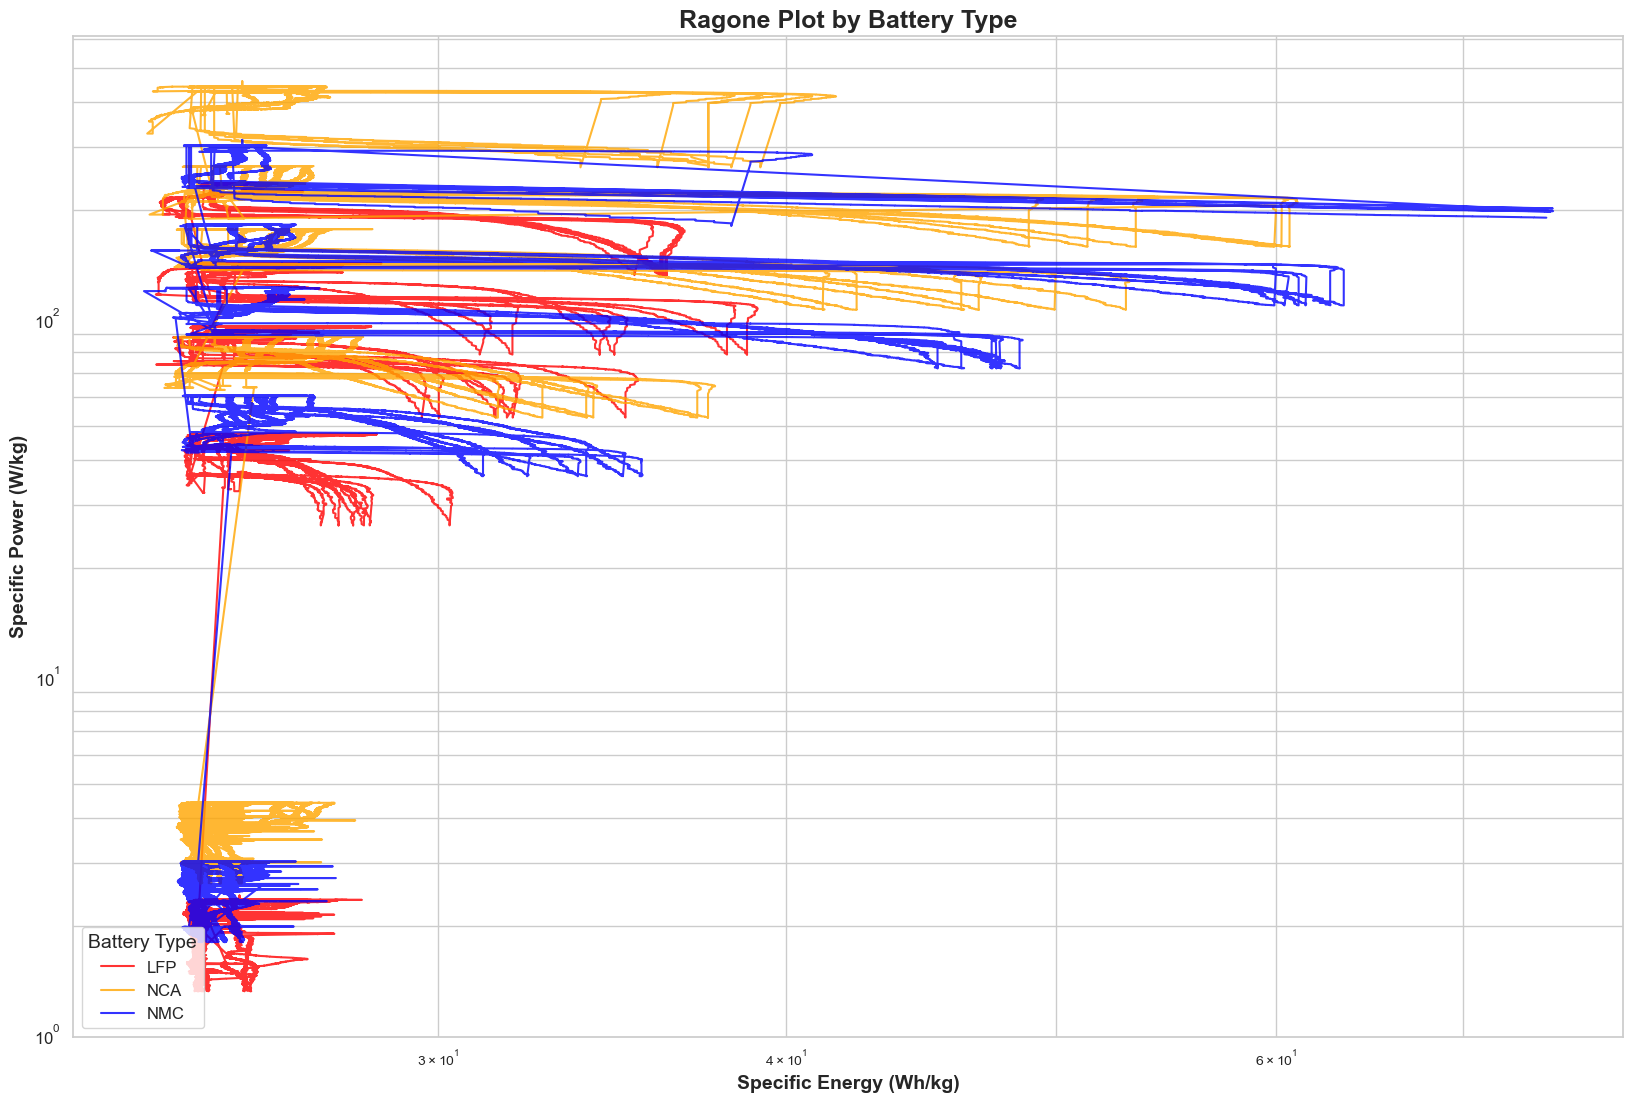

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
# Calculate Power and Cumulative Energy
df['Energy(Wh/kg)'] = (df['C_rate_numeric'] * df['Voltage(V)'])/df['Cell_Weight_kg']


# Group by battery type
groups = df.groupby('Type')

# Set Seaborn style for better visuals
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(20, 13))
colors = {'LFP': 'red', 'NMC': 'blue', 'NCA': 'orange'}  # Define custom colors

# Plot each group with improved style
for name, group in groups:
    plt.loglog(
        group['Surface_Temp(degC)'], 
        group['Energy(Wh/kg)'],
        linestyle='-', 
        color=colors[name], 
        label=name,
        alpha=0.8
    )

plt.title('Ragone Plot by Battery Type', fontsize=18, weight='bold')
plt.xlabel('Specific Energy (Wh/kg)', fontsize=14, weight='bold')
plt.ylabel('Specific Power (W/kg)', fontsize=14, weight='bold')
plt.grid(which='both')

# Add a legend
plt.legend(title='Battery Type', fontsize=12, title_fontsize=14, loc='lower left', frameon=True)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Tight layout for better spacing

# Show the plot
plt.show()


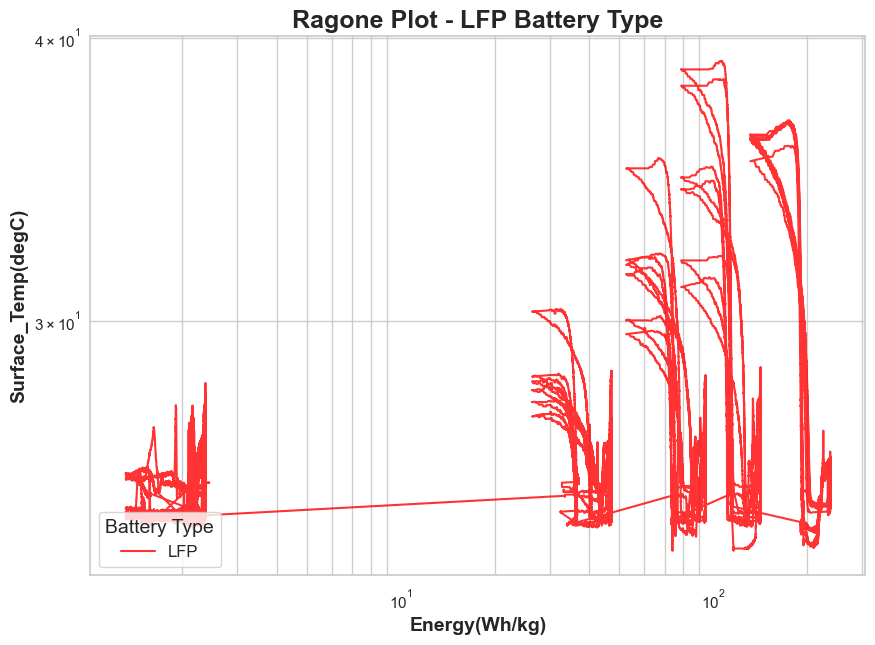

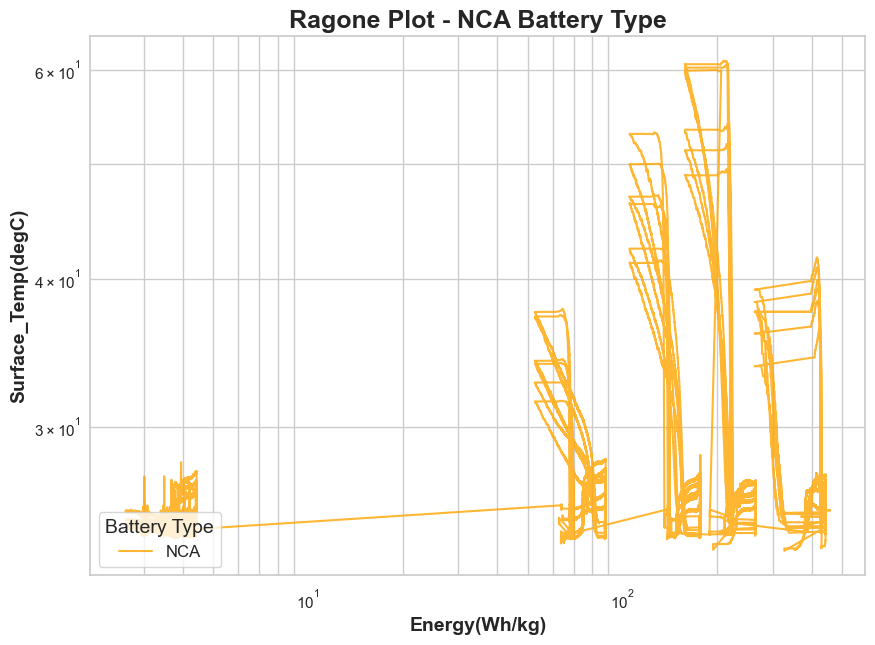

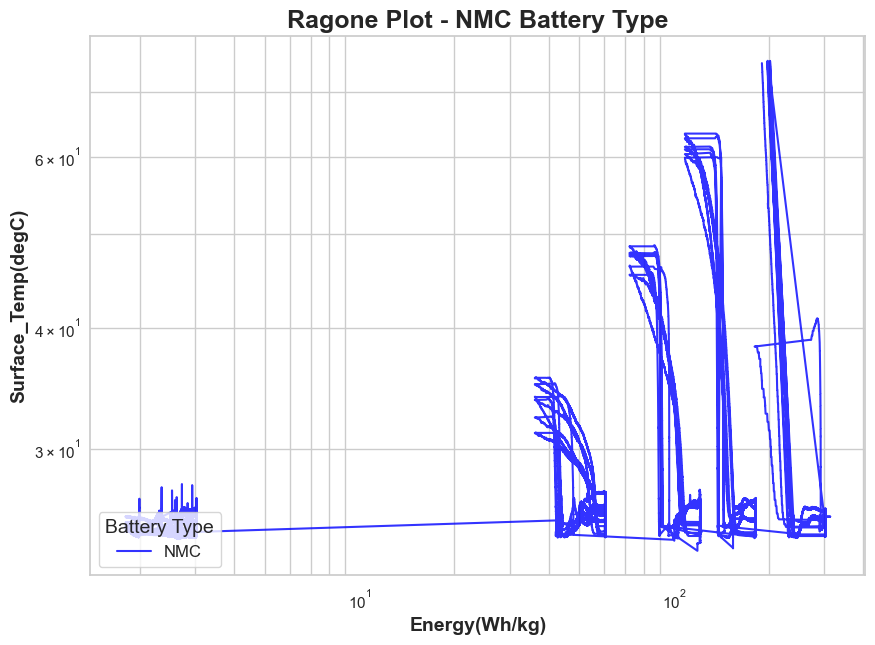

In [11]:
for name, group in groups:
    plt.figure(figsize=(10, 7))
    plt.loglog(
        group['Energy(Wh/kg)'], 
        group['Surface_Temp(degC)'],  
        linestyle='-', 
        color=colors[name], 
        label=name,
        alpha=0.8
    )
    plt.title(f'Ragone Plot - {name} Battery Type', fontsize=18, weight='bold')
    plt.xlabel('Energy(Wh/kg)', fontsize=14, weight='bold')
    plt.ylabel('Surface_Temp(degC)', fontsize=14, weight='bold')
    plt.grid(which='both')
    plt.legend(title='Battery Type', fontsize=12, title_fontsize=14, loc='lower left', frameon=True)
    plt.show()


                    Surface_Temp(degC)  Current(A)  Voltage(V)  C_rate_numeric
Surface_Temp(degC)            1.000000   -0.544337   -0.163181        0.197511
Current(A)                   -0.544337    1.000000    0.250644        0.032123
Voltage(V)                   -0.163181    0.250644    1.000000        0.175082
C_rate_numeric                0.197511    0.032123    0.175082        1.000000


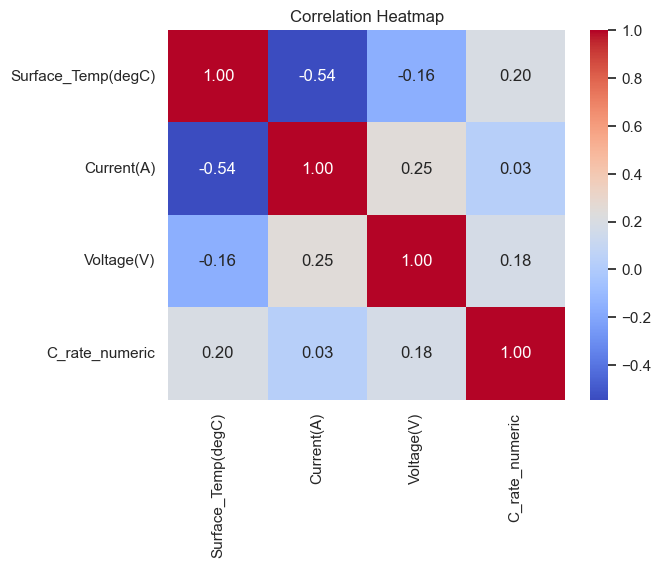

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlations between Surface Temperature (T), Current (A), and Voltage (V)
correlation_matrix = df[['Surface_Temp(degC)', 'Current(A)', 'Voltage(V)', 'C_rate_numeric']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Linear Regression

Mean Squared Error: 2.63
R^2 Score: 0.59


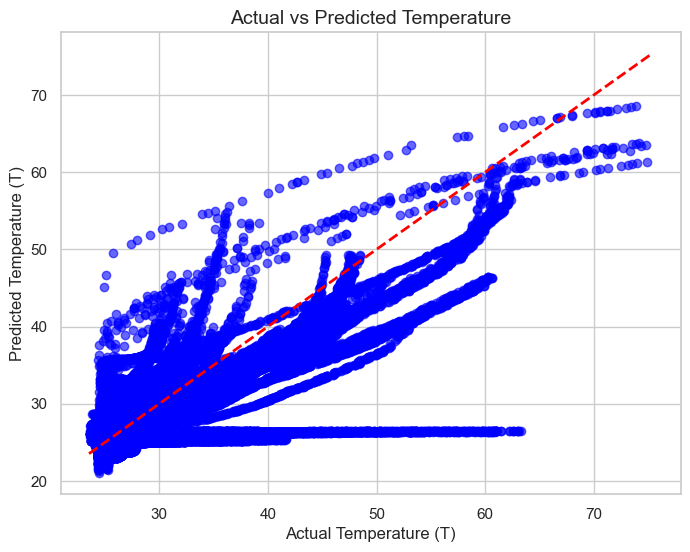

In [37]:

# Features and Target
X = df[['Current(A)', 'Voltage(V)', 'C_rate_numeric', 'Step_Time(s)']]  # Independent variables
y = df['Surface_Temp(degC)']   # Dependent variable (Temperature)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted temperature
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Temperature (T)', fontsize=12)
plt.ylabel('Predicted Temperature (T)', fontsize=12)
plt.title('Actual vs Predicted Temperature', fontsize=14)
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:     Surface_Temp(degC)   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                 4.409e+05
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:19:15   Log-Likelihood:            -6.3200e+06
No. Observations:             2981391   AIC:                         1.264e+07
Df Residuals:                 2981386   BIC:                         1.264e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.9509      0.011   2516.

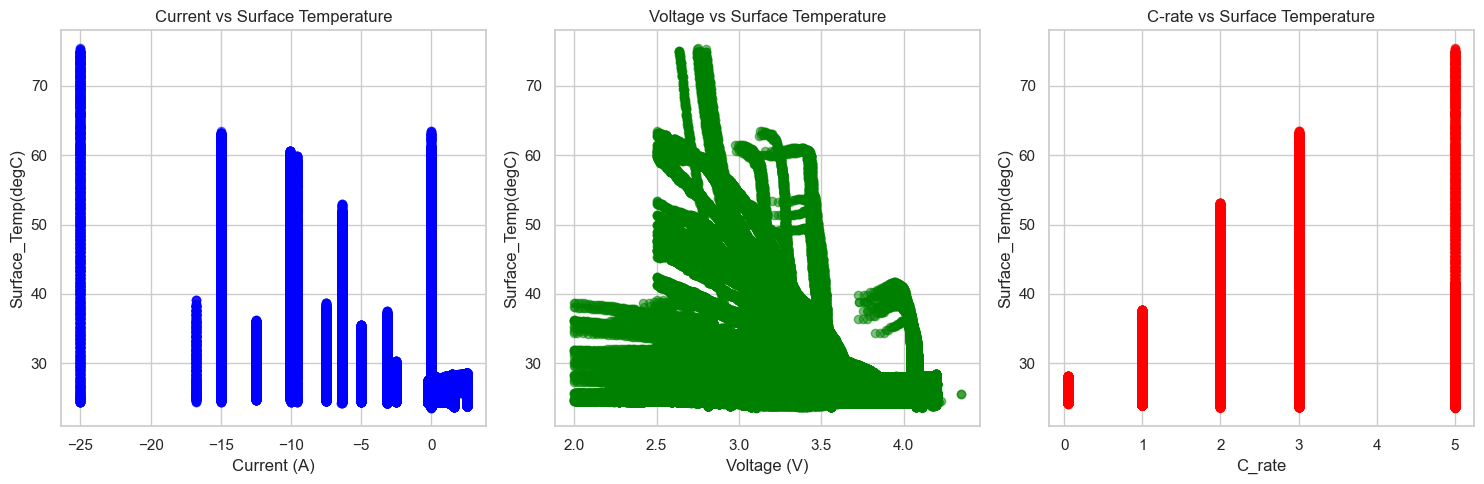

In [38]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is a pandas DataFrame with the required data
# Features and target variable
X = df[['Current(A)', 'Voltage(V)', 'C_rate_numeric','Step_Time(s)']]  # Include all features
y = df['Surface_Temp(degC)']  # Target variable

# Fit the Linear Regression model
linear_model = LinearRegression().fit(X, y)

# Extract coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Prepare a dictionary for all model components
model_summary = {
    "Intercept": intercept,
    "Current(A)": coefficients[0],
    "Voltage(V)": coefficients[1],
    "C_rate_numeric": coefficients[2]
}

import statsmodels.api as sm

# Add a constant for the intercept term
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Print the summary table
print(model.summary())


# Optional visualization for each feature against Surface_Temp
plt.figure(figsize=(15, 5))

# Current vs Surface Temperature
plt.subplot(1, 3, 1)
plt.scatter(df['Current(A)'], df['Surface_Temp(degC)'], color='blue', alpha=0.5)
plt.title('Current vs Surface Temperature')
plt.xlabel('Current (A)')
plt.ylabel('Surface_Temp(degC)')

# Voltage vs Surface Temperature
plt.subplot(1, 3, 2)
plt.scatter(df['Voltage(V)'], df['Surface_Temp(degC)'], color='green', alpha=0.5)
plt.title('Voltage vs Surface Temperature')
plt.xlabel('Voltage (V)')
plt.ylabel('Surface_Temp(degC)')

# C-rate vs Surface Temperature
plt.subplot(1, 3, 3)
plt.scatter(df['C_rate_numeric'], df['Surface_Temp(degC)'], color='red', alpha=0.5)
plt.title('C-rate vs Surface Temperature')
plt.xlabel('C_rate')
plt.ylabel('Surface_Temp(degC)')

plt.tight_layout()
plt.show()


R² Score: 0.34689730361519877
Mean Squared Error: 4.222396264375879


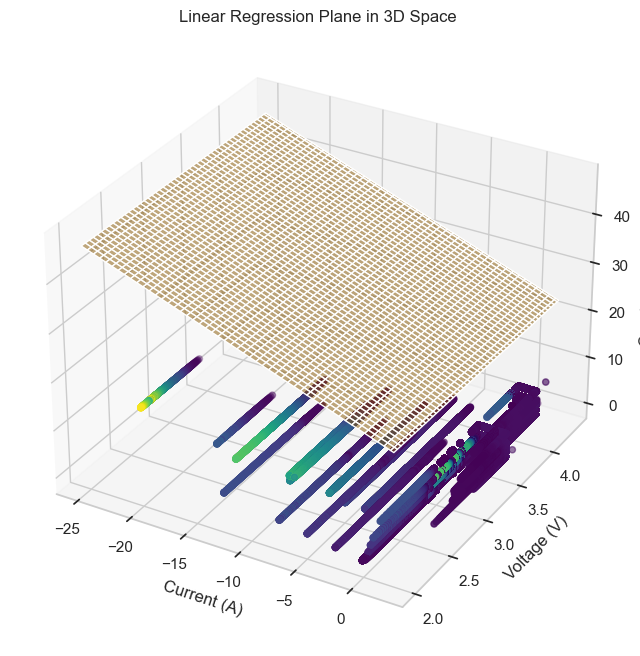

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Fit the Linear Regression model
linear_model = LinearRegression().fit(X, y)

# Generate predictions for the entire dataset
y_pred = linear_model.predict(X)

# Compute R^2 (Coefficient of Determination)
r_squared = linear_model.score(X, y)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print R² and MSE
print(f"R² Score: {r_squared}")
print(f"Mean Squared Error: {mse}")

# Generate a meshgrid for plotting the regression plane
x_range = np.linspace(df['Current(A)'].min(), df['Current(A)'].max(), 100)
y_range = np.linspace(df['Voltage(V)'].min(), df['Voltage(V)'].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# For each grid point, we use the average value of 'C_rate_numeric'
c_rate_avg = df['C_rate_numeric'].mean()

# Stack the mesh grid for Current and Voltage, and use the constant C_rate
grid_points = np.c_[x_mesh.ravel(), y_mesh.ravel(), np.ones_like(x_mesh.ravel()) * c_rate_avg]

# Convert the grid points into a DataFrame with the same column names as the features
grid_df = pd.DataFrame(grid_points, columns=['Current(A)', 'Voltage(V)', 'C_rate_numeric'])

# Predict the z-values (Surface_Temp) for each point on the grid using the DataFrame
z_mesh = linear_model.predict(grid_df).reshape(x_mesh.shape)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data (Current, Voltage, and C-rate vs Surface_Temp)
scatter = ax.scatter(X['Current(A)'], X['Voltage(V)'], X['C_rate_numeric'], c=y, cmap='viridis')

# Plot the regression plane
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='orange', alpha=0.5)

# Labels and title
ax.set_xlabel('Current (A)')
ax.set_ylabel('Voltage (V)')
ax.set_zlabel('C_rate_numeric')
ax.set_title('Linear Regression Plane in 3D Space')

# Show the plot
plt.show()


# Polynomial Regression

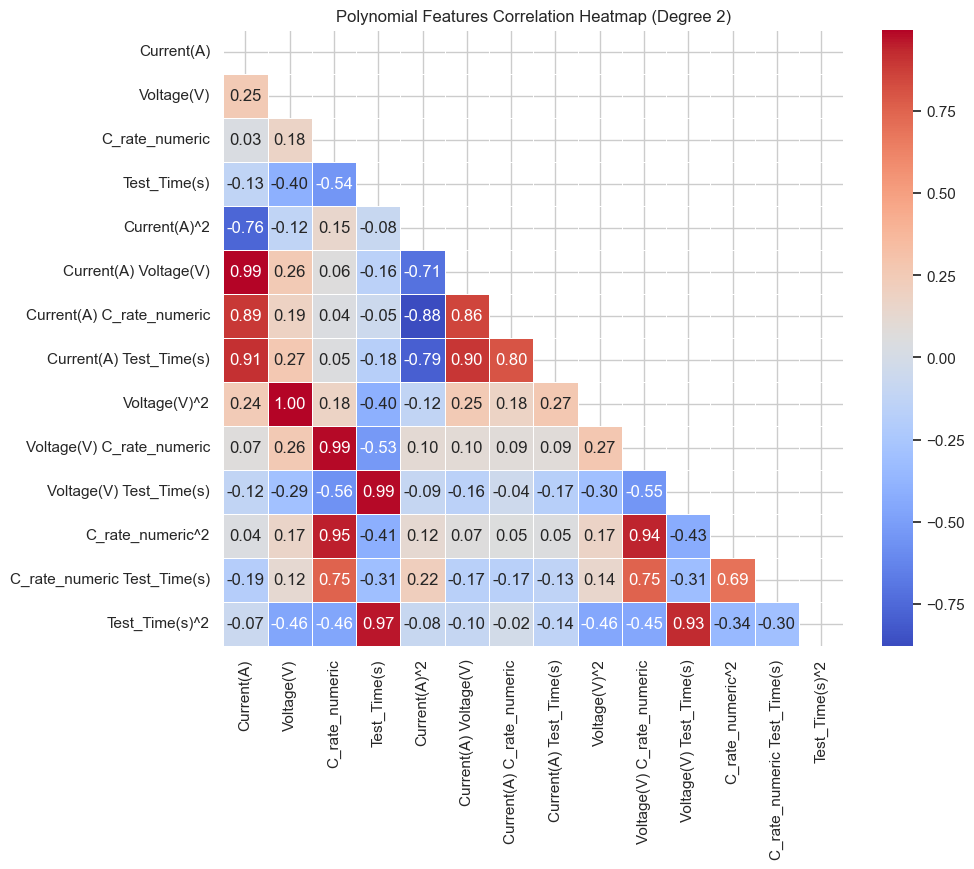

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Select the features for polynomial transformation
X = df[['Current(A)', 'Voltage(V)', 'C_rate_numeric', 'Test_Time(s)']]

# Apply PolynomialFeatures (degree=2 for quadratic terms and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Create a DataFrame with the polynomial features
poly_features = poly.get_feature_names_out(['Current(A)', 'Voltage(V)', 'C_rate_numeric','Test_Time(s)'])
df_poly = pd.DataFrame(X_poly, columns=poly_features)

# Compute the correlation matrix for the polynomial features
correlation_matrix_poly = df_poly.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix_poly, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix_poly, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Polynomial Features Correlation Heatmap (Degree 2)")
plt.show()



In [17]:
df

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Voltage(V),Current(A),Surface_Temp(degC),C_rate,C_rate_numeric,Type,Name,Cell_Weight_kg,Energy(Wh/kg)
0,2019-08-29 15:29:32.927,1.000400,1.0000,1,3.355970,0.0,25.063690,05C,0.05,NCA,NCA,0.0475,3.532600
1,2019-08-29 15:29:33.927,2.000400,2.0000,1,3.355984,0.0,25.063002,05C,0.05,NCA,NCA,0.0475,3.532615
2,2019-08-29 15:29:34.927,3.000800,3.0004,1,3.356062,0.0,25.063002,05C,0.05,NCA,NCA,0.0475,3.532697
3,2019-08-29 15:29:35.927,4.000200,3.9998,1,3.356112,0.0,25.063002,05C,0.05,NCA,NCA,0.0475,3.532749
4,2019-08-29 15:29:36.927,5.000600,5.0002,1,3.356094,0.0,25.052788,05C,0.05,NCA,NCA,0.0475,3.532731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981386,2019-09-19 12:55:15.630,13978.326736,3597.0005,6,2.953483,0.0,24.830494,5C,5.00,LFP,LFP,0.0760,194.308083
2981387,2019-09-19 12:55:16.631,13979.327736,3598.0015,6,2.953304,0.0,24.815275,5C,5.00,LFP,LFP,0.0760,194.296319
2981388,2019-09-19 12:55:17.630,13980.327036,3599.0008,6,2.953433,0.0,24.815275,5C,5.00,LFP,LFP,0.0760,194.304821
2981389,2019-09-19 12:55:18.630,13981.326736,3600.0005,6,2.953300,0.0,24.854372,5C,5.00,LFP,LFP,0.0760,194.296037


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Apply Polynomial Features (degree=2 for quadratic terms)
X = df[['Current(A)', 'Voltage(V)', 'C_rate_numeric', 'Test_Time(s)' ]]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
poly_model = LinearRegression().fit(X_poly, y)

# Coefficients for all features (including interaction and squared terms)
coefficients = poly_model.coef_

# Print all coefficients with clarification
print("Coefficients for all features (including interaction and squared terms):")

# Get feature names to print them alongside the coefficients
feature_names = poly.get_feature_names_out()  # Get the feature names after polynomial transformation

for feature, coef in zip(feature_names, coefficients):
    print(f"Coefficient for {feature}: {coef}")

# Specifically print the coefficients for Current (C), Voltage (V), and Surface Temperature (T)
print('__________________________________________________________')
print(f"Coefficient for Current (C): {coefficients[0]}")  # First feature in X_poly
print(f"Coefficient for Voltage (V): {coefficients[1]}")  # Second feature in X_poly
print(f"Coefficient for Surface Temperature (T): {coefficients[2]}")  # Third feature in X_poly


Coefficients for all features (including interaction and squared terms):
Coefficient for Current(A): -6.18978952749707
Coefficient for Voltage(V): 6.508023199785729
Coefficient for C_rate_numeric: 1.4755376875068138
Coefficient for Test_Time(s): 8.5532596537304e-05
Coefficient for Current(A)^2: 0.021949343521672948
Coefficient for Current(A) Voltage(V): 1.6952386691649928
Coefficient for Current(A) C_rate_numeric: 0.264292298722354
Coefficient for Current(A) Test_Time(s): -3.982649660276288e-05
Coefficient for Voltage(V)^2: -0.8460385810241755
Coefficient for Voltage(V) C_rate_numeric: -0.3801626542694008
Coefficient for Voltage(V) Test_Time(s): -2.8520701694182686e-05
Coefficient for C_rate_numeric^2: -0.08412128993527931
Coefficient for C_rate_numeric Test_Time(s): 3.761668968659725e-05
Coefficient for Test_Time(s)^2: -7.175475338335027e-11
__________________________________________________________
Coefficient for Current (C): -6.18978952749707
Coefficient for Voltage (V): 6.50802319

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

X = X.reset_index(drop=True)  # Reset index of X
y = y.reset_index(drop=True)  # Reset index of y

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert polynomial features to DataFrame for better interpretation
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Add a constant term for statsmodels
X_poly_with_const = sm.add_constant(X_poly_df)

# Fit the model using statsmodels
model = sm.OLS(y, X_poly_with_const).fit()


# Print the OLS regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Surface_Temp(degC)   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 3.340e+05
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:11:33   Log-Likelihood:            -5.6065e+06
No. Observations:             2981391   AIC:                         1.121e+07
Df Residuals:                 2981376   BIC:                         1.121e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [30]:
# Make predictions using the polynomial regression model
y_pred = poly_model.predict(X_poly)

# Calculate R² (R-squared) score
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print R² and MSE
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.6106732262824183
Mean Squared Error: 2.5170496524761963


#### R² Score (Coefficient of Determination): 0.61

This means that approximately 61% of the variance in the target variable (Surface_Temp(degC)) is explained by the features (Current(A), Voltage(V), and C_rate_numeric). This is a moderately good fit, but there's still room for improvement.

#### Mean Squared Error (MSE): 2.517

The MSE represents the average of the squared differences between the predicted values and the actual values. Lower values indicate better performance, but the value itself depends on the scale of your target variable. In this case, it seems to be an acceptable MSE based on the model's fit.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Step 1: Polynomial Features Transformation
X = df[['Current(A)', 'Voltage(V)', 'C_rate_numeric', 'Test_Time(s)', ]]

# Apply PolynomialFeatures (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get the feature names after transformation
feature_names = poly.get_feature_names_out(['Current(A)', 'Voltage(V)', 'C_rate_numeric','Test_Time(s)'])

# Step 2: Train/Test Split
y = df['Surface_Temp(degC)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 3: Fit the Polynomial Regression Model
poly_model = LinearRegression().fit(X_train, y_train)

# Step 4: Evaluate the Initial Model
y_pred = poly_model.predict(X_test)
initial_r2 = r2_score(y_test, y_pred)
initial_mse = mean_squared_error(y_test, y_pred)

# Step 5: Apply Lasso Regularization (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model = lasso.fit(X_train, y_train)

# Evaluate the Lasso Model
y_pred_lasso = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Step 6: Apply Ridge Regularization (L2 Regularization)
ridge = Ridge(alpha=0.1)  # Adjust alpha for regularization strength
ridge_model = ridge.fit(X_train, y_train)

# Evaluate the Ridge Model
y_pred_ridge = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Step 7: Feature Selection Using Recursive Feature Elimination (RFE)
selector = RFE(poly_model, n_features_to_select=7, step=1)
selector = selector.fit(X_train, y_train)

# Selected features based on RFE
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit the model again using the selected features
rfe_model = LinearRegression().fit(X_train_selected, y_train)

# Evaluate the RFE Model
y_pred_rfe = rfe_model.predict(X_test_selected)
rfe_r2 = r2_score(y_test, y_pred_rfe)
rfe_mse = mean_squared_error(y_test, y_pred_rfe)



# Step 9: Create a Comparison Table
results = {
    "Model": ["Initial Polynomial Model", "Lasso Model", "Ridge Model", "RFE Model"],
    "R² Score": [initial_r2, lasso_r2, ridge_r2, rfe_r2],
    "Mean Squared Error": [initial_mse, lasso_mse, ridge_mse, rfe_mse]
}

results_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
print(results_df)


/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.135e+06, tolerance: 1.547e+03
  model = cd_fast.enet_coordinate_descent(
/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.37811e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Model Performance Comparison:
                      Model  R² Score  Mean Squared Error
0  Initial Polynomial Model  0.607211            2.507677
1               Lasso Model  0.502051            3.179047
2               Ridge Model  0.607211            2.507677
3                 RFE Model  0.530616            2.996680


# Hyperparameter Tuning 

In [31]:
# Fit the Ridge Regression model (L2 Regularization)
ridge_model = Ridge(alpha=1000)  # alpha is the regularization strength
ridge_model.fit(X_poly, y)

# Make predictions
y_pred_ridge = ridge_model.predict(X_poly)

# Calculate R² and MSE for Ridge Regression
r2_ridge = r2_score(y, y_pred_ridge)
mse_ridge = mean_squared_error(y, y_pred_ridge)

# Print results
print(f"R² Score for Ridge Regression: {r2_ridge}")
print(f"Mean Squared Error for Ridge Regression: {mse_ridge}")

R² Score for Ridge Regression: 0.610022871802408
Mean Squared Error for Ridge Regression: 2.521254281154222


/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06914e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.00407e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.82936e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.00718e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/minhtrinh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.90687e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/minhtrinh/anacond

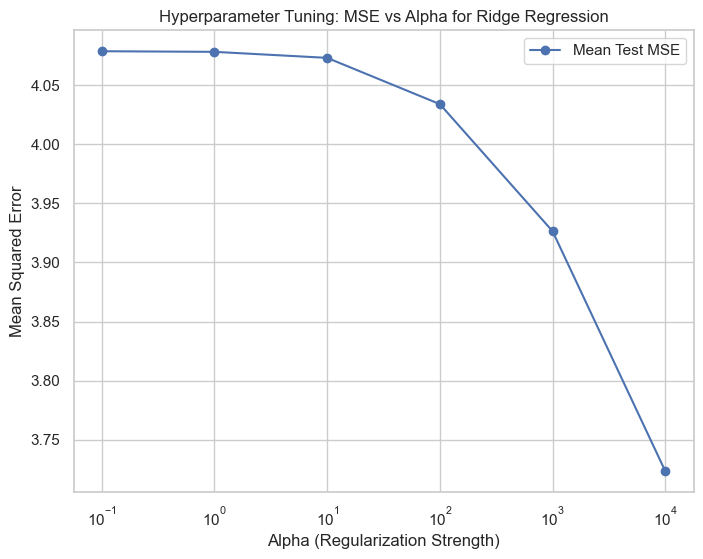

In [32]:
# Define the parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000]}

# Set up the Ridge regression model
model = Ridge()

# Set up GridSearchCV with 5-fold cross-validation and use MSE as scoring metric
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_poly, y)

# Extract the mean test scores (negative MSE from GridSearchCV)
mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Negate to get positive MSE
alpha_values = grid_search.cv_results_['param_alpha'].data  # Alpha values used in the search

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, mean_test_scores, marker='o', linestyle='-', color='b', label='Mean Test MSE')

# Adding labels and title
plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning: MSE vs Alpha for Ridge Regression')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Assuming X_train and y_train are numpy arrays, convert them to pandas DataFrame/Series
X_train = pd.DataFrame(X_train)  # If X_train is an ndarray, convert it to DataFrame
y_train = pd.Series(y_train)     # If y_train is an ndarray, convert it to Series

# Initialize the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store scores
r2_scores = []
mse_scores = []

# Loop through each fold
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Add constant to the training and validation data
    X_train_fold_const = sm.add_constant(X_train_fold)
    X_val_fold_const = sm.add_constant(X_val_fold)

    # Ensure the indices of X_train_fold_const and y_train_fold are aligned
    X_train_fold_const = X_train_fold_const.reset_index(drop=True)
    y_train_fold = y_train_fold.reset_index(drop=True)

    # Fit the OLS model
    model = sm.OLS(y_train_fold, X_train_fold_const).fit()

    # Predict on the validation set
    y_pred_fold = model.predict(X_val_fold_const)

    # Calculate R² and MSE
    r2_scores.append(r2_score(y_val_fold, y_pred_fold))
    mse_scores.append(mean_squared_error(y_val_fold, y_pred_fold))

# Print average results across folds
print(f"Average R² Score: {np.mean(r2_scores)}")
print(f"Average Mean Squared Error: {np.mean(mse_scores)}")




Average R² Score: 0.6114906860848708
Average Mean Squared Error: 2.519664902378836


## Compare between three different battery types

In [27]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame
# Initialize an empty list to store the results for each battery type
results = []

# Group by 'Type' and perform polynomial regression for each group
for type_value, group in df.groupby('Type'):
    print('--------------------------------------------------')
    print(f"\nPolynomial Regression for Type: {type_value}")
    
    # Extract features and target for the current group
    X_group = group[['Current(A)', 'Voltage(V)', 'C_rate_numeric','Test_Time(s)']]  # Independent variables
    y_group = group['Surface_Temp(degC)']  # Target variable (Surface_Temp)
    
    # Apply Polynomial Features (degree=2 for quadratic terms and interaction terms)
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_group)
    
    # Fit the Polynomial Regression model
    poly_model = LinearRegression().fit(X_poly, y_group)
    
    # Coefficients for all features (including interaction and squared terms)
    coefficients = poly_model.coef_
    
    # Get the intercept
    intercept = poly_model.intercept_
        
    # Get feature names to print them alongside the coefficients
    feature_names = poly.get_feature_names_out()  # Get the feature names after polynomial transformation
    
    # Generate predictions
    y_pred = poly_model.predict(X_poly)
    
    # Compute R² (Coefficient of Determination)
    r_squared = poly_model.score(X_poly, y_group)
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_group, y_pred)
    
    # Prepare the result for this type
    result = [type_value, intercept] + list(coefficients) + [r_squared, mse]
    
    # Add the result to the list
    results.append(result)

# Define column names
columns = ['Type', 'Intercept'] + list(feature_names) + ['R²', 'MSE']

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=columns)

# Display the table
print("\nPolynomial Regression Results:")
print(results_df)


--------------------------------------------------

Polynomial Regression for Type: LFP
--------------------------------------------------

Polynomial Regression for Type: NCA
--------------------------------------------------

Polynomial Regression for Type: NMC

Polynomial Regression Results:
  Type  Intercept  Current(A)  Voltage(V)  C_rate_numeric  Test_Time(s)  \
0  LFP  55.605943   -2.587875  -19.090660        3.242173     -0.000104   
1  NCA -13.942885   -9.240668   20.189371        3.136333      0.000274   
2  NMC -18.379880   -9.604681   23.667326        2.344359      0.000243   

   Current(A)^2  Current(A) Voltage(V)  Current(A) C_rate_numeric  \
0     -0.048436               0.902272                  -0.087200   
1     -0.124289               2.756882                  -0.106128   
2     -0.033999               2.411950                   0.081932   

   Current(A) Test_Time(s)  Voltage(V)^2  Voltage(V) C_rate_numeric  \
0                -0.000045      2.962779               